# **DeepFace - Age, Gender, Expression, Headpose and Recognition**

---


In this lesson, we use the **DeepFace API for Age, Gender, Expression Facial and Recognition. We even use the headpose library to obtain head direction/tilt**. DeepFace is an easy to use python module that provides access to several Facial Detection and Recognition models. It's very simple to use to let's dive in.

1. Install the necessary modules and download our files
2. Demonstrate facial landmarks
3. Obtain Age, Gender, Emotional Expression and Ethnicity using DeepFace
4. Perform Facial Similarity
5. Perform Facial Recognition


**NOTE** Change to High-RAM setting.

## **Install the necessary modules and download our files**

In [ ]:
!pip install deepface
!pip install dlib

In [2]:
# Some imports and our image viewing function
import dlib
import tarfile
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 6):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [2]:
# Download facial landmarks
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/shape_predictor_68_face_landmarks.dat

'wget' is not recognized as an internal or external command,
operable program or batch file.


# **Steps to Get the Face Bounding Box**




In [ ]:
from imutils import face_utils
import dlib
import cv2

detector = dlib.get_frontal_face_detector()
image = cv2.imread("face.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 0)   # This 0 is the number of times to upscale the image to detect smaller faces
for (i, rect) in enumerate(rects):
    (x,y,w,h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(image, (x,y), (x+w, y+h), (0,255,0), 2)


## **Demonstrate facial landmarks**

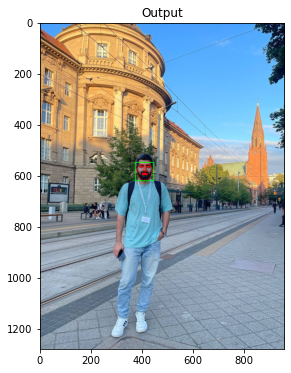

In [6]:
from imutils import face_utils

p = "shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(p)

image = cv2.imread('me.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
# Get faces 
rects = detector(gray, 0)

# For each detected face, find the landmark.
for (i, rect) in enumerate(rects):
    # Make the prediction and transfom it to numpy array
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    # Draw on our image, all the finded cordinate points (x,y) 
    for (x, y) in shape:
        cv2.circle(image, (x, y), 2, (0, 0,255), -1)

# Show the image
imshow("Output", image)

## **Obtain Age, Gender, Emotional Expression and Ethnicity using DeepFace**


In [18]:
!gdown --id 1Id32-d-nS9BooBLLkw1PQhvLWWAukCsq
!gdown --id 1txWignSWdELl8cWdZHYqIlSE2ZRjI8WI
!gdown --id 1d_tQRWjvQ5i4lZyUfFEfRj7LzXWXseBY
!gdown --id 1kWp2CVg_xTIFqdZAwfN_86A3grim9NyI

!mv facial_expression_model_weights.zip /root/.deepface/weights/facial_expression_model_weights.zip
!mv age_model_weights.h5 /root/.deepface/weights/age_model_weights.h5
!mv gender_model_weights.h5 /root/.deepface/weights/gender_model_weights.h5
!mv race_model_single_batch.zip /root/.deepface/weights/race_model_single_batch.zip

C:\Users\saeid\anaconda3\envs\pytorch\lib\site-packages\gdown\__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Id32-d-nS9BooBLLkw1PQhvLWWAukCsq
To: x:\Programing\Training\computerVision\ComputerVisionCourses\Face_recognition\facial_expression_model_weights.zip

  0%|          | 0.00/5.54M [00:00<?, ?B/s]
 47%|████▋     | 2.62M/5.54M [00:00<00:00, 26.0MB/s]
100%|██████████| 5.54M/5.54M [00:00<00:00, 33.4MB/s]
C:\Users\saeid\anaconda3\envs\pytorch\lib\site-packages\gdown\__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1txWignSWdELl8cWdZHYqIlSE2ZRjI8WI
From (redirected): https://drive.google.com/uc?id=1txWignSWdELl8cWdZHYqIlSE

In [10]:
from deepface import DeepFace

# Analyze the image for age, gender, race, and emotion
obj = DeepFace.analyze(img_path="me.jpg", actions=['age', 'gender', 'race', 'emotion'])

# Access the first dictionary in the list
if isinstance(obj, list):
    obj = obj[0]  # Get the first detected face

# Print the details
print(f"{obj['age']} years old, {obj['dominant_race']}, {obj['dominant_emotion']}, {obj['gender']}")


Action: emotion: 100%|██████████| 4/4 [00:00<00:00, 10.70it/s]

26 years old, middle eastern, happy, {'Woman': 0.0007497954356949776, 'Man': 99.99924898147583}


Action: emotion: 100%|██████████| 4/4 [00:00<00:00, 10.58it/s]


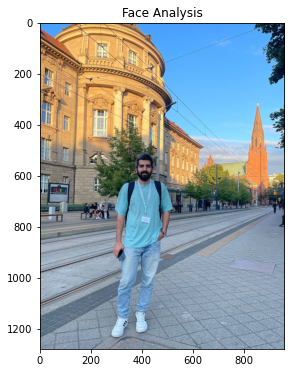

[   {   'age': 26,
        'dominant_emotion': 'happy',
        'dominant_gender': 'Man',
        'dominant_race': 'middle eastern',
        'emotion': {   'angry': 0.0003759368834265839,
                       'disgust': 4.455257704026933e-12,
                       'fear': 1.1332293113228535e-06,
                       'happy': 90.65914098376876,
                       'neutral': 9.3360377452396,
                       'sad': 0.004396801421670514,
                       'surprise': 4.994792859487229e-05},
        'face_confidence': 0.91,
        'gender': {'Man': 99.99924898147583, 'Woman': 0.0007497954356949776},
        'race': {   'asian': 0.446932902559638,
                    'black': 0.4493608605116606,
                    'indian': 11.233159899711609,
                    'latino hispanic': 19.75221335887909,
                    'middle eastern': 43.806323409080505,
                    'white': 24.312013387680054},
        'region': {   'h': 71,
                      'left_eye'

In [11]:
from deepface import DeepFace
import pprint

img_path = "me.jpg"
image = cv2.imread(img_path)

obj = DeepFace.analyze(img_path = img_path,
                       actions = ['age', 'gender', 'race', 'emotion'])
imshow("Face Analysis", image)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(obj)

#### **Create a simple function to display our results on the image**

In [15]:
import cv2

def drawFace(img_path, obj):
  image = cv2.imread(img_path)
  x = obj['region']['x'] 
  y = obj['region']['y'] 
  h = obj['region']['h'] 
  w = obj['region']['w'] 
  age = obj['age']
  gender = obj['gender']
  gender = 'F' if gender == 'Woman' else 'M'
  dominant_emotion = obj['dominant_emotion']
  dominant_race = obj['dominant_race']
  dominant_emotion = obj['dominant_emotion']
  description = f'{age}{gender} - {dominant_emotion}'
  cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
  cv2.putText(image, description, (x,y-10) , cv2.FONT_HERSHEY_PLAIN,2, (0,255,0), 3)
  cv2.putText(image, dominant_race, (x,y+h+30) , cv2.FONT_HERSHEY_PLAIN,2, (0,255,0), 3)
  imshow("Face Analysis", image)

Action: emotion: 100%|██████████| 4/4 [00:00<00:00, 10.82it/s]


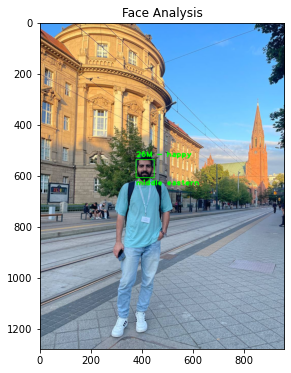

{   'age': 26,
    'dominant_emotion': 'happy',
    'dominant_gender': 'Man',
    'dominant_race': 'middle eastern',
    'emotion': {   'angry': 0.0003759368834265839,
                   'disgust': 4.455257704026933e-12,
                   'fear': 1.1332293113228535e-06,
                   'happy': 90.65914098376876,
                   'neutral': 9.3360377452396,
                   'sad': 0.004396801421670514,
                   'surprise': 4.994792859487229e-05},
    'face_confidence': 0.91,
    'gender': {'Man': 99.99924898147583, 'Woman': 0.0007497954356949776},
    'race': {   'asian': 0.446932902559638,
                'black': 0.4493608605116606,
                'indian': 11.233159899711609,
                'latino hispanic': 19.75221335887909,
                'middle eastern': 43.806323409080505,
                'white': 24.312013387680054},
    'region': {   'h': 71,
                  'left_eye': None,
                  'right_eye': None,
                  'w': 71,
            

In [17]:
from deepface import DeepFace

# Analyze the image for age, gender, race, and emotion
obj = DeepFace.analyze(img_path="me.jpg", actions=['age', 'gender', 'race', 'emotion'])

# Access the first dictionary in the list
if isinstance(obj, list):
    obj = obj[0]  # Get the first detected face

drawFace("me.jpg", obj)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(obj)

#### **Change backends of face detection**

24-12-26 12:01:16 - shape_predictor_5_face_landmarks.dat.bz2 is going to be downloaded


Downloading...
From: http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2
To: C:\Users\saeid\.deepface\weights\shape_predictor_5_face_landmarks.dat.bz2
5.71MB [00:01, 4.14MB/s]
Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  8.70it/s]


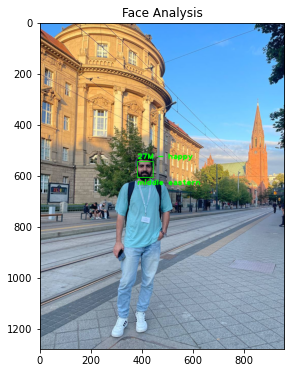

{   'age': 27,
    'dominant_emotion': 'happy',
    'dominant_gender': 'Man',
    'dominant_race': 'middle eastern',
    'emotion': {   'angry': 1.2195012327731392,
                   'disgust': 7.2401443326234205e-09,
                   'fear': 0.0004117466933023309,
                   'happy': 54.911402160608894,
                   'neutral': 43.698420745040224,
                   'sad': 0.16932703865406148,
                   'surprise': 0.0009396938017596522},
    'face_confidence': 1.0,
    'gender': {'Man': 99.99948740005493, 'Woman': 0.000508791799802566},
    'race': {   'asian': 1.5603052452206612,
                'black': 1.1052819900214672,
                'indian': 10.717938095331192,
                'latino hispanic': 26.992502808570862,
                'middle eastern': 34.45507884025574,
                'white': 25.16888976097107},
    'region': {   'h': 62,
                  'left_eye': (423, 566),
                  'right_eye': (398, 566),
                  'w': 62,
  

In [21]:
from deepface import DeepFace

# backends = ['opencv', 'ssd', 'dlib', 'mtcnn', 'retinaface']

img_path = "me.jpg"
image = cv2.imread(img_path)
obj = DeepFace.analyze(img_path = "me.jpg", actions = ['age', 'gender', 'race', 'emotion'], detector_backend = 'dlib')
if isinstance(obj, list):
    obj = obj[0]  
drawFace(img_path, obj)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(obj)

## **Perform Facial Similarity**

In [22]:
result  = DeepFace.verify("me.jpg", "Saeidkhoobdel.jpg")
print("Is verified: ", result["verified"])
result

24-12-26 12:02:17 - vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: C:\Users\saeid\.deepface\weights\vgg_face_weights.h5
100%|██████████| 580M/580M [00:46<00:00, 12.6MB/s] 


Is verified:  True


{'verified': True,
 'distance': 0.3907471639051522,
 'threshold': 0.68,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 376,
   'y': 538,
   'w': 71,
   'h': 71,
   'left_eye': None,
   'right_eye': None},
  'img2': {'x': 71,
   'y': 81,
   'w': 170,
   'h': 170,
   'left_eye': (187, 147),
   'right_eye': (123, 148)}},
 'time': 48.18}

### **We can even use different Distance Metrics**

In [25]:
#metrics = ["cosine", "euclidean", "euclidean_l2"]

result  = DeepFace.verify("me.jpg", "Saeidkhoobdel.jpg", distance_metric = 'euclidean')
print("Is verified: ", result["verified"])
result

Is verified:  True


{'verified': True,
 'distance': 0.8840216783599285,
 'threshold': 1.17,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'euclidean',
 'facial_areas': {'img1': {'x': 376,
   'y': 538,
   'w': 71,
   'h': 71,
   'left_eye': None,
   'right_eye': None},
  'img2': {'x': 71,
   'y': 81,
   'w': 170,
   'h': 170,
   'left_eye': (187, 147),
   'right_eye': (123, 148)}},
 'time': 0.45}

## **Perform Facial Recognition**

In [31]:
from deepface import DeepFace
import pandas as pd

df = DeepFace.find(img_path = "me.jpg", db_path = './faces_db/', detector_backend = 'dlib')
print(df)

24-12-26 12:09:09 - Searching me.jpg in 1 length datastore
24-12-26 12:09:11 - find function duration 1.9859411716461182 seconds
[                       identity                                      hash  \
0  ./faces_db/Saeidkhoobdel.jpg  c1076a4cb8e76a31409deff5cdfc081e9879128c   

   target_x  target_y  target_w  target_h  source_x  source_y  source_w  \
0        86       105       154       155       381       546        62   

   source_h  threshold  distance  
0        62       0.68  0.397101  , Empty DataFrame
Columns: [identity, hash, target_x, target_y, target_w, target_h, source_x, source_y, source_w, source_h, threshold, distance]
Index: []]
